##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



In [72]:
import patsy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import classification_report as CR

### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

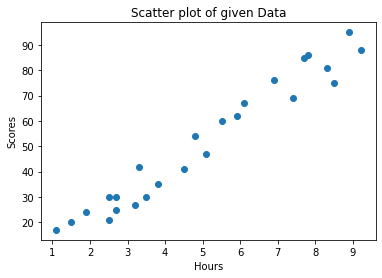

Coefficients:  [[0.        ]
 [9.71054094]]
Interception:  [1.         2.79419668]


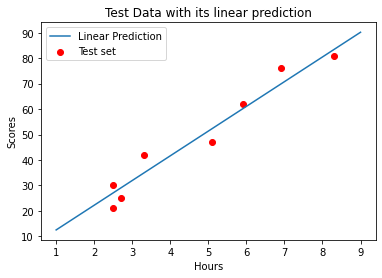

Mean Squared Error
11.80972880707587
Mean Absolute Error
2.249999999999999
Root Mean Squared Error
3.436528598320676


In [73]:
data1 = pd.read_csv('SCORES.csv')

data1.shape
X = patsy.dmatrices("Hours ~ Scores",data1)

plt.scatter(data1['Hours'],data1['Scores'])
plt.title('Scatter plot of given Data')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

data1.head()
data1.describe()


x_train, x_test, y_train, y_test = train_test_split(X[0],X[1],test_size = 0.3,random_state=42)
LRModel = LinearRegression()

LRModel.fit(x_train, y_train)
print("Coefficients: ",LRModel.coef_) #współczynniki regresji liniowej
print("Interception: ",LRModel.intercept_) #współczynik beta 0
y_predicted = LRModel.predict(x_test)


plt.figure()

domain = np.linspace(1,9,500)
plt.plot(domain, LRModel.intercept_[1]+LRModel.coef_[1]*domain,label = "Linear Prediction")
plt.scatter(x_test,y_test[:,1],label = "Test set",color = 'r')
plt.title('Test Data with its linear prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

print("Mean Squared Error")
print(MSE(y_test,y_predicted))

print("Mean Absolute Error")
print(MAE(y_test,y_predicted))

print("Root Mean Squared Error")
print(np.sqrt(MSE(y_test,y_predicted)))

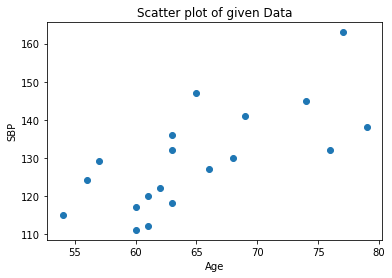

Coefficients:  [[0.        ]
 [1.44882707]]
Interception:  [ 1.         36.17936475]


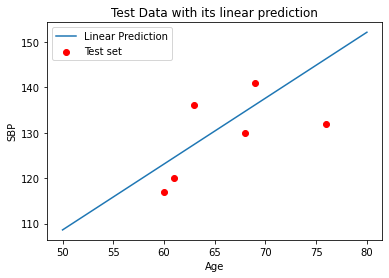

Mean Squared Error
31.744739174785266
Mean Absolute Error
3.5877274929070615
Root Mean Squared Error
5.634246992703219


In [74]:
data1 = pd.read_csv('SBP.csv')

data1.shape
X = patsy.dmatrices("Age ~ SBP",data1)

plt.scatter(data1['Age'],data1['SBP'])
plt.title('Scatter plot of given Data')
plt.xlabel('Age')
plt.ylabel('SBP')
plt.show()

data1.head()
data1.describe()


x_train, x_test, y_train, y_test = train_test_split(X[0],X[1],test_size = 0.3,random_state=42)
LRModel = LinearRegression()

LRModel.fit(x_train, y_train)
print("Coefficients: ",LRModel.coef_) #współczynniki regresji liniowej
print("Interception: ",LRModel.intercept_) #współczynik beta 0
y_predicted = LRModel.predict(x_test)


plt.figure()

domain = np.linspace(50,80,500)
plt.plot(domain, LRModel.intercept_[1]+LRModel.coef_[1]*domain,label = "Linear Prediction")
plt.scatter(x_test,y_test[:,1],label = "Test set",color = 'r')
plt.title('Test Data with its linear prediction')
plt.xlabel('Age')
plt.ylabel('SBP')
plt.legend()
plt.show()

print("Mean Squared Error")
print(MSE(y_test,y_predicted))

print("Mean Absolute Error")
print(MAE(y_test,y_predicted))

print("Root Mean Squared Error")
print(np.sqrt(MSE(y_test,y_predicted)))

Uzyskane wyniki nie są zadowalające, być może ze względu na nie-do-końca liniowy charakter danych wzgledem ich feature'ów. Możnabyłoby zastosować liniową regresję względem funkcji (nieidentycznościowych) parametrów.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [75]:
#Z racji dużej liczby wymiarów problemu nie jest zastosowana wizualizacja

data3 = pd.read_csv('PETROL.csv')



data3.head()
data3.describe()


X = patsy.dmatrices("Podatek_paliwowy + Sredni_przychod + Utwardzone_autostrady + Procent_ludnosci_z_prawem_jazdy ~ Zuzycie_paliwa",data3)
x_train, x_test, y_train, y_test = train_test_split(X[0],X[1],test_size = 0.3,random_state=42)
LRModel = LinearRegression()

LRModel.fit(x_train, y_train)
print("Coefficients: ",LRModel.coef_) #współczynniki regresji liniowej
print("Interception: ",LRModel.intercept_) #współczynik beta 0
y_predicted = LRModel.predict(x_test)


print("Mean Squared Error")
print(MSE(y_test,y_predicted))

print("Mean Absolute Error")
print(MAE(y_test,y_predicted))

print("Root Mean Squared Error")
print(np.sqrt(MSE(y_test,y_predicted)))



Coefficients:  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-3.99336011e+01 -4.53815410e-02 -4.95597538e-03  1.03711642e+03]]
Interception:  [  1.        513.1398382]
Mean Squared Error
4038.3345101773402
Mean Absolute Error
31.513262232787103
Root Mean Squared Error
63.54789146916946


Uzyskane wyniki nie są zadowalające. Brak regularyzacji danych może powodować trudności w doborze odpowiedniego dopasowania.

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [76]:
data4 = pd.read_csv('HEART.csv')
data4.describe()
data4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [77]:
data4 = data4.replace('?',np.NAN)
data4.drop(columns = ['slope','ca','thal'],inplace=True)
data4.info()
data4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    293 non-null    object 
 4   chol        271 non-null    object 
 5   fbs         286 non-null    object 
 6   restecg     293 non-null    object 
 7   thalach     293 non-null    object 
 8   exang       293 non-null    object 
 9   oldpeak     294 non-null    float64
 10  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 25.4+ KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,NaN,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [78]:
data4.dropna(inplace = True)
#data4 = pd.get_dummies(data4,prefix='cp_')

data4.info()
data4.rename(columns = {'num       ':'num'},inplace=True)
# X = patsy.dmatrices("age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang +oldpeak ~ num",data4)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         261 non-null    int64  
 1   sex         261 non-null    int64  
 2   cp          261 non-null    int64  
 3   trestbps    261 non-null    object 
 4   chol        261 non-null    object 
 5   fbs         261 non-null    object 
 6   restecg     261 non-null    object 
 7   thalach     261 non-null    object 
 8   exang       261 non-null    object 
 9   oldpeak     261 non-null    float64
 10  num         261 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 24.5+ KB


In [86]:

data4.dropna(inplace = True)
data4 = pd.get_dummies(data4,prefix='cp_ ')


data4.rename(columns = {'num       ':'num'},inplace=True)

x_train, x_test, y_train, y_test = train_test_split(data4.drop(columns = ['num']),data4['num'],test_size = 0.2,random_state=42)
LRModel = LogisticRegression()

LRModel.fit(x_train, y_train)
y_predicted = LRModel.predict(x_test)


print(CR(y_pred=y_predicted,y_true=y_test))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.73      0.80      0.76        20

    accuracy                           0.81        53
   macro avg       0.80      0.81      0.80        53
weighted avg       0.82      0.81      0.81        53



C:\Users\igor\anaconda3\envs\label\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
